In [ ]:
#Importando las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Cargar el Dataset
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#Leer el Dataset
%cd '/content/gdrive/MyDrive/CoderHouse/Data_Science'
CO2_emissions = pd.read_csv('CO2_emissions.csv')

/content/gdrive/MyDrive/CoderHouse/Data_Science


In [ ]:
CO2_emissions

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [ ]:
CO2_emissions.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
CO2_emissions.shape

(36, 5)

In [ ]:
print(CO2_emissions.corr())

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


<ipython-input-23-bb41eec20f1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(CO2_emissions.corr())


In [ ]:
print(CO2_emissions.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


Hacemos una lista de los valores independientes, variables X. Los valores dependientes, variable llamada y.

Ecuación: CO2 = β0 + (β1 Weight) + (β2  Volume) + e


In [ ]:
#Estableciendo el valor para X e Y
X = CO2_emissions[['Weight', 'Volume']]
y = CO2_emissions['CO2']

## Comprobación de valores atípicos

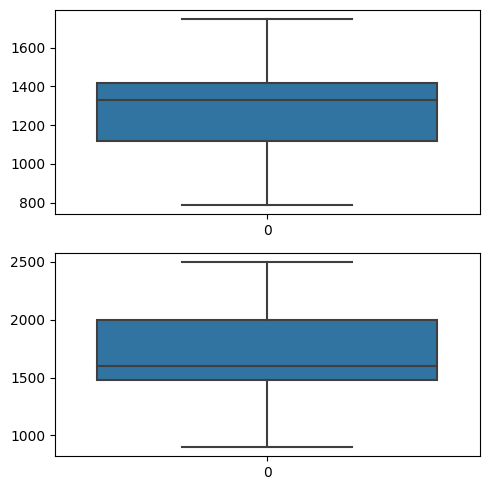

In [ ]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(CO2_emissions['Weight'], ax = axs[0])
plt2 = sns.boxplot(CO2_emissions['Volume'], ax = axs[1])
plt.tight_layout()

#Análisis exploratorio de datos

## Distribución de la variable objetivo

<ipython-input-27-53b1fe8b5e1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CO2_emissions['CO2']);


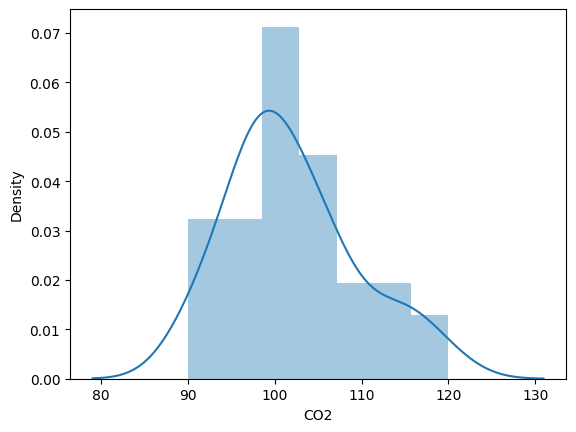

In [ ]:
sns.distplot(CO2_emissions['CO2']);

Conclusión: se distribuye normalmente

## Relación del CO2 con otras variables

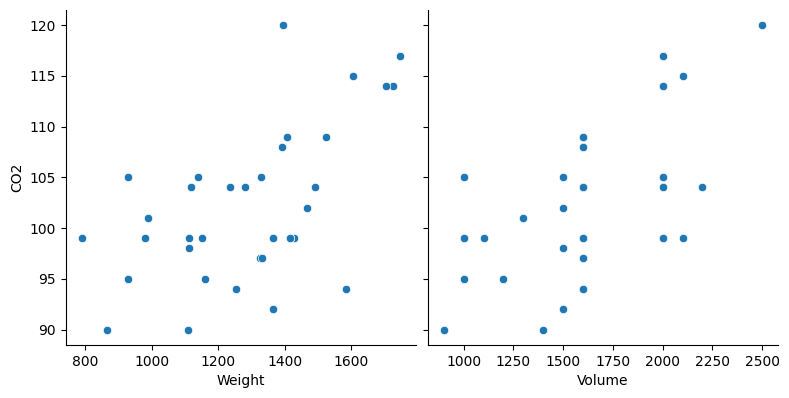

In [ ]:
sns.pairplot(CO2_emissions, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

Mapa de calor La función sns.heatmap() crea una visualización que muestra la matriz de correlación de un conjunto de datos como un mapa de calor. El parámetro annot de esta función muestra o no los valores de correlación en las celdas del mapa de calor. Si este parámetro se establece en True, se muestran los valores de correlación en las celdas.

<ipython-input-29-5669ba3a4a60>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(CO2_emissions.corr(), annot = True, cmap = 'coolwarm')


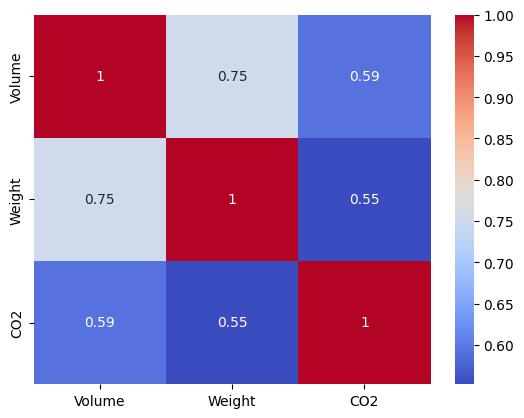

In [ ]:
# Matriz de correlación y se la representa como un mapa de calor.
sns.heatmap(CO2_emissions.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Construcción del modelo


## Dividir el conjunto de datos en entrenamiento y prueba


Tenemos que dividir nuestro conjunto de datos en conjuntos de entrenamiento y de prueba. Para ello, importaremos train_test_split de la biblioteca sklearn.model_selection. Manteniendo el 70% de los datos en el conjunto de datos de entrenamiento y el 30% restante en el conjunto de datos de prueba.

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
y_train.shape

(25,)

In [ ]:
y_test.shape

(11,)

In [ ]:
reg_model = linear_model.LinearRegression()

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
#Coeficientes del modelo
print('Intercept: ',reg_model.intercept_)
#Se empareja los nombres de las características con los coeficientes
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [ ]:
#Predicción el resultado de los conjuntos de prueba y de entrenamiento
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [ ]:
print("Predicción para el conjunto de pruebas: {}".format(y_pred))

Predicción para el conjunto de pruebas: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [ ]:
# Valor real y valor previsto
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
0,99,90.415719,8.584281,8.670991
19,105,102.163234,2.836766,2.701682
32,104,99.563632,4.436368,4.265738
35,120,104.566618,15.433382,12.861151
7,92,101.546577,-9.546577,-10.376714
12,99,95.947700,3.052300,3.083131
29,114,108.640118,5.359882,4.701650
33,108,102.226542,5.773458,5.345794
5,105,92.803748,12.196252,11.615478
1,95,97.273271,-2.273271,-2.392917


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Error absoluto medio:', mae)
print('Error cuadrático medio:', mse)
print('Error cuadrático medio:', r2)

Error absoluto medio: 6.901980901636316
Error cuadrático medio: 63.39765310998794
Error cuadrático medio: 7.96226432053018
